### Part 2 Visualization and Corr

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import math
import pandas as pd
import plotly.express as px
import re

In [2]:
cdc_20_21 = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined_df.csv', encoding = "UTF-8")

#### Part 2.1 Map all the attributes on a US map

2.1.1 Decouple the Location column:

In [3]:
cdc_20_21[['state', 'county']] = cdc_20_21['Location'].str.split('_', expand=True)


In [4]:
cdc_20_21.shape

(3076, 40)

Now drop the location column:

In [5]:
cdc_20_21_new = cdc_20_21.drop(columns=['Location'])

In [6]:
cdc_20_21_new

,All teeth lost among adults aged >=65 years,Cervical cancer screening among adult women aged 21-65 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Mammography use among women aged 50-74 years,"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening","Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",Sleeping less than 7 hours among adults aged >=18 years,Visits to dentist or dental clinic among adults aged >=18 years,Any disability among adults aged >=18 years,Arthritis among adults aged >=18 years,...,No leisure-time physical activity among adults aged >=18 years,Obesity among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Self-care disability among adults aged >=18 years,Stroke among adults aged >=18 years,Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure,Vision disability among adults aged >=18 years,Visits to doctor for routine checkup within the past year among adults aged >=18 years,state,county
0,16.95,68.35,57.35,59.95,28.45,28.15,34.20,48.50,28.80,18.30,...,29.00,31.70,11.40,3.85,3.40,62.30,6.15,60.70,AK,Aleutians East
1,12.05,69.95,62.40,59.50,32.55,30.50,33.95,55.55,24.20,16.35,...,25.05,30.95,9.55,2.90,2.70,59.60,4.50,61.10,AK,Aleutians West
2,9.75,78.15,68.85,66.25,40.65,32.90,30.90,64.85,25.25,21.20,...,20.40,32.95,10.30,2.90,2.60,60.45,4.05,62.80,AK,Anchorage
3,28.05,72.45,56.65,51.25,19.50,18.25,37.05,41.75,43.70,24.60,...,34.45,42.95,19.45,7.30,5.10,58.65,10.95,61.90,AK,Bethel
4,11.75,79.90,68.10,60.75,33.10,30.00,32.10,59.25,28.20,21.85,...,20.95,36.00,11.55,3.30,3.30,60.50,4.40,62.80,AK,Bristol Bay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,13.70,80.05,63.85,60.95,38.65,29.40,30.30,66.40,29.00,22.60,...,25.85,34.45,10.90,3.25,2.70,65.20,4.35,70.35,WY,Sweetwater
3072,7.95,84.70,67.35,71.70,42.30,37.65,26.50,76.70,21.25,20.50,...,16.30,21.95,8.20,2.35,2.20,63.85,3.10,66.75,WY,Teton
3073,13.00,80.65,63.70,62.00,33.90,29.05,35.10,63.90,29.35,23.00,...,23.15,33.50,10.95,3.30,2.85,64.95,4.30,64.55,WY,Uinta
3074,12.75,80.40,59.00,63.60,41.05,26.05,30.50,64.45,30.10,25.45,...,23.85,33.55,11.10,3.40,3.05,68.15,4.50,65.05,WY,Washakie


2.1.2 Create a choropleth plotter function and plot the county-level data.

__Solution to county name to FIPS code conversion__
1. Read this lookup table and use string match to look up.
2. The county name and FIPS not aligning caused the initial empty map.

Get the 5-char FIPS code. The first two chars are state, the latter three chars are for a county within a state.

e.g. 'STATEFP': '06',    'COUNTYFP': '075',

Thus, after the look up split the code and store into two columns:
'STATEFP' and 'COUNTYFP'

Credit goes to: https://github.com/ChuckConnell/articles/blob/master/fips2county.tsv


In [9]:
state_county_lookup = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/fips2county.tsv',  sep='\t', header=0)

In [31]:
state_county_lookup['CountyFIPS']


0        1001
1        1003
2        1005
3        1007
4        1009
        ...  
3138    56037
3139    56039
3140    56041
3141    56043
3142    56045
Name: CountyFIPS, Length: 3143, dtype: int64

In [87]:
print(us_states_geojson['features'][0]['properties'])

{'STATEFP': '06', 'COUNTYFP': '075', 'COUNTYNS': '00277302', 'AFFGEOID': '0500000US06075', 'GEOID': '06075', 'NAME': 'San Francisco', 'LSAD': '06', 'ALAND': 121485107, 'AWATER': 479107241}


Covert the state_county_lookup to a dictionary:

In [54]:
fips_lookup  = state_county_lookup[['STATE_COUNTY', 'CountyFIPS']].set_index('STATE_COUNTY').to_dict()['CountyFIPS']

In [62]:
fips_lookup["MS | HUMPHREYS"]


28053

AK | ALEUTIANS EAST BOROUGH

AK	Aleutians East
read the 

In [73]:
cdc_20_21_plot = pd.read_csv(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/cleaned_data/combined_df.csv', encoding = "UTF-8")

In [74]:
cdc_20_21_plot['GeoLocation'] = cdc_20_21_plot['Location'].str.replace('_', ' | ')

In [90]:
cdc_20_21_plot

,All teeth lost among adults aged >=65 years,Cervical cancer screening among adult women aged 21-65 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Mammography use among women aged 50-74 years,"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening","Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",Sleeping less than 7 hours among adults aged >=18 years,Visits to dentist or dental clinic among adults aged >=18 years,Location,Any disability among adults aged >=18 years,...,No leisure-time physical activity among adults aged >=18 years,Obesity among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Self-care disability among adults aged >=18 years,Stroke among adults aged >=18 years,Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure,Vision disability among adults aged >=18 years,Visits to doctor for routine checkup within the past year among adults aged >=18 years,GeoLocation,GEOID
0,16.95,68.35,57.35,59.95,28.45,28.15,34.20,48.50,AK_Aleutians East,28.80,...,29.00,31.70,11.40,3.85,3.40,62.30,6.15,60.70,AK | ALEUTIANS EAST BOROUGH,02013
1,12.05,69.95,62.40,59.50,32.55,30.50,33.95,55.55,AK_Aleutians West,24.20,...,25.05,30.95,9.55,2.90,2.70,59.60,4.50,61.10,AK | ALEUTIANS WEST CENSUS AREA,02016
2,9.75,78.15,68.85,66.25,40.65,32.90,30.90,64.85,AK_Anchorage,25.25,...,20.40,32.95,10.30,2.90,2.60,60.45,4.05,62.80,AK | ANCHORAGE MUNICIPALITY,02020
3,28.05,72.45,56.65,51.25,19.50,18.25,37.05,41.75,AK_Bethel,43.70,...,34.45,42.95,19.45,7.30,5.10,58.65,10.95,61.90,AK | BETHEL CENSUS AREA,02050
4,11.75,79.90,68.10,60.75,33.10,30.00,32.10,59.25,AK_Bristol Bay,28.20,...,20.95,36.00,11.55,3.30,3.30,60.50,4.40,62.80,AK | BRISTOL BAY BOROUGH,02060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,13.70,80.05,63.85,60.95,38.65,29.40,30.30,66.40,WY_Sweetwater,29.00,...,25.85,34.45,10.90,3.25,2.70,65.20,4.35,70.35,WY | SWEETWATER,56037
3072,7.95,84.70,67.35,71.70,42.30,37.65,26.50,76.70,WY_Teton,21.25,...,16.30,21.95,8.20,2.35,2.20,63.85,3.10,66.75,WY | TETON,56039
3073,13.00,80.65,63.70,62.00,33.90,29.05,35.10,63.90,WY_Uinta,29.35,...,23.15,33.50,10.95,3.30,2.85,64.95,4.30,64.55,WY | UINTA,56041
3074,12.75,80.40,59.00,63.60,41.05,26.05,30.50,64.45,WY_Washakie,30.10,...,23.85,33.55,11.10,3.40,3.05,68.15,4.50,65.05,WY | WASHAKIE,56043


Need to add some regular expressions:


cdc_20_21_new

AK | east aluesian

state	county

The following cells are in group 1 dedicated to testing the FIPS matching function.

In [26]:
def fips_match(stringA, stringB):
    # Splitting the strings at "|"
    leftA, rightA = stringA.lower().split("|")
    leftB, rightB = stringB.lower().split("|")

    # Check exact match on the left
    if leftA != leftB:
        return False

    # Check if rightB matches the first 2 to 3 words of rightA
    match_pattern = r'^(' + re.escape(rightB) + r')(\s+\w+){0,2}'
    return bool(re.match(match_pattern, rightA))


# Example usage
stringA = "AK | ALEUTIANS EAST BOROUGH"
stringB = "AK | Aleutians East"
print(fips_match(stringA, stringB)) 



True


In [20]:
#match_found = any(fips_match(key, "AK | Aleutians East") for key in fips_lookup)

#matched_key = None

for key in fips_lookup:
    #print(key)
    if fips_match(key, "AK | Aleutians East"):
        matched_key = key
        break

print(matched_key)



AK | ALEUTIANS EAST BOROUGH


In [76]:
for index, row in cdc_20_21_plot.iterrows():
    for key in fips_lookup:
        if fips_match(key,row['GeoLocation']):
            matched_key = key
            break
    print(matched_key)
    print(row['GeoLocation'])
        # store the matched key in the dataframe
    cdc_20_21_plot.loc[index, 'GeoLocation'] = matched_key
    cdc_20_21_plot.loc[index, 'GEOID'] = fips_lookup[matched_key]


    #row[index, 'GEOID'] = fips_lookup[matched_key]
    #cdc_20_21_plot.loc[index, 'GEOID'] = fips_lookup[matched_key]
    #cdc_20_21_plot['GEOID'] = cdc_20_21_plot['GEOID'].astype('int64')
    

AK | ALEUTIANS EAST BOROUGH
AK | Aleutians East
AK | ALEUTIANS WEST CENSUS AREA
AK | Aleutians West
AK | ANCHORAGE MUNICIPALITY
AK | Anchorage
AK | BETHEL CENSUS AREA
AK | Bethel
AK | BRISTOL BAY BOROUGH
AK | Bristol Bay
AK | CHUGACH CENSUS AREA
AK | Chugach
AK | COPPER RIVER CENSUS AREA
AK | Copper River
AK | DENALI BOROUGH
AK | Denali
AK | DILLINGHAM CENSUS AREA
AK | Dillingham
AK | FAIRBANKS NORTH STAR BOROUGH
AK | Fairbanks North Star
AK | HAINES BOROUGH
AK | Haines
AK | HOONAH-ANGOON CENSUS AREA
AK | Hoonah-Angoon
AK | JUNEAU CITY AND BOROUGH
AK | Juneau
AK | KENAI PENINSULA BOROUGH
AK | Kenai Peninsula
AK | KETCHIKAN GATEWAY BOROUGH
AK | Ketchikan Gateway
AK | KODIAK ISLAND BOROUGH
AK | Kodiak Island
AK | KUSILVAK CENSUS AREA
AK | Kusilvak
AK | LAKE AND PENINSULA BOROUGH
AK | Lake and Peninsula
AK | MATANUSKA-SUSITNA BOROUGH
AK | Matanuska-Susitna
AK | NOME CENSUS AREA
AK | Nome
AK | NORTH SLOPE BOROUGH
AK | North Slope
AK | NORTHWEST ARCTIC BOROUGH
AK | Northwest Arctic
AK | PET

In [88]:
cdc_20_21_plot['GEOID'] = cdc_20_21_plot['GEOID'].astype('int64')
# Convert FIPS codes in DataFrame to string and zero-pad to 5 characters
cdc_20_21_plot['GEOID'] = cdc_20_21_plot['GEOID'].apply(lambda x: str(x).zfill(5))


In [107]:
import geopandas as gpd
import matplotlib.pyplot as plt
usa_map = gpd.read_file(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/mapdata/cb_2018_us_county_500k.shp')

In [110]:
# merge the map and our PLACE dataset
map_and_PLACE_data = usa_map.merge(cdc_20_21_plot, on="GEOID")

In [138]:
title = 'Depression among adults aged >=18 years in the USA by County'
col = 'case_growth_rate'
source = 'Source: CDC_PLACE Data'


fig, ax = plt.subplots(1, figsize=(200, 80))
map_and_PLACE_data.plot(column="Obesity among adults aged >=18 years", cmap="viridis", linewidth=0.4, ax=ax, edgecolor=".5")

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=100), cmap="viridis")

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.07, 0.3, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)


In [134]:
# Safe the map to a png
fig.savefig(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/map_export.png', dpi=300)

In [139]:
#cdc_20_21_new['Depression among adults aged >=18 years'].describe()Obesity among adults aged >=18 years
#cdc_20_21_new[''].describe()
cdc_20_21_new['Obesity among adults aged >=18 years'].describe()

count    3076.000000
mean       37.331502
std         4.527449
min        17.150000
25%        35.050000
50%        37.600000
75%        40.200000
max        51.700000
Name: Obesity among adults aged >=18 years, dtype: float64

In [136]:
cdc_20_21_new['Depression among adults aged >=18 years'].describe()

count    3076.000000
mean       22.563459
std         3.209521
min         9.750000
25%        20.550000
50%        22.500000
75%        24.700000
max        32.650000
Name: Depression among adults aged >=18 years, dtype: float64

In [137]:
cdc_20_21.columns

Index(['All teeth lost among adults aged >=65 years',
       'Cervical cancer screening among adult women aged 21-65 years',
       'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years',
       'Mammography use among women aged 50-74 years',
       'Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening',
       'Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years',
       'Sleeping less than 7 hours among adults aged >=18 years',
       'Visits to dentist or dental clinic among adults aged >=18 years',
       'Location', 'Any disability among adults aged >=18 years',
       'Arthritis among adults aged >=18 years',
       'Binge drinking among adults aged >=18 years',
       'Cancer (excluding skin cancer) among

In [3]:
# show dataframe
#cdc_20_21
cdc_20_21_noloc = cdc_20_21.drop(columns=['Location'])

#### 2.1 Correaltions

In [4]:
cdc_20_21_noloc.corr()

,All teeth lost among adults aged >=65 years,Cervical cancer screening among adult women aged 21-65 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Mammography use among women aged 50-74 years,"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening","Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",Sleeping less than 7 hours among adults aged >=18 years,Visits to dentist or dental clinic among adults aged >=18 years,Any disability among adults aged >=18 years,Arthritis among adults aged >=18 years,...,Mental health not good for >=14 days among adults aged >=18 years,Mobility disability among adults aged >=18 years,No leisure-time physical activity among adults aged >=18 years,Obesity among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Self-care disability among adults aged >=18 years,Stroke among adults aged >=18 years,Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure,Vision disability among adults aged >=18 years,Visits to doctor for routine checkup within the past year among adults aged >=18 years
All teeth lost among adults aged >=65 years,1.000000,-0.517050,-0.353771,-0.328739,-0.478316,-0.543400,0.703226,-0.867729,0.906366,0.603527,...,0.834275,0.913054,0.859443,0.661821,0.928203,0.871257,0.848069,0.463675,0.837847,0.324814
Cervical cancer screening among adult women aged 21-65 years,-0.517050,1.000000,0.690926,0.647149,0.569368,0.612547,-0.234617,0.661407,-0.528512,-0.024640,...,-0.460392,-0.450565,-0.489151,-0.304888,-0.551696,-0.493694,-0.364223,0.102689,-0.526265,0.295852
"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",-0.353771,0.690926,1.000000,0.640471,0.632480,0.695847,-0.086132,0.508020,-0.360650,0.081533,...,-0.220791,-0.311817,-0.345787,-0.238464,-0.369755,-0.395511,-0.270730,0.160365,-0.433513,0.376985
Mammography use among women aged 50-74 years,-0.328739,0.647149,0.640471,1.000000,0.409420,0.606734,0.018861,0.405156,-0.361295,-0.078590,...,-0.262400,-0.272398,-0.207442,-0.083316,-0.385734,-0.256375,-0.211597,0.217628,-0.274025,0.482458
"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening",-0.478316,0.569368,0.632480,0.409420,1.000000,0.679586,-0.308360,0.556814,-0.444842,-0.082682,...,-0.359074,-0.441894,-0.494479,-0.327707,-0.494424,-0.549246,-0.474416,-0.016576,-0.567042,0.179051
"Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",-0.543400,0.612547,0.695847,0.606734,0.679586,1.000000,-0.315192,0.608192,-0.522545,-0.133820,...,-0.411923,-0.511807,-0.513240,-0.343083,-0.559323,-0.598072,-0.518416,-0.010073,-0.616995,0.212371
Sleeping less than 7 hours among adults aged >=18 years,0.703226,-0.234617,-0.086132,0.018861,-0.308360,-0.315192,1.000000,-0.658513,0.670546,0.506848,...,0.744478,0.710701,0.678242,0.578028,0.704035,0.645130,0.617595,0.497645,0.630544,0.466746
Visits to dentist or dental clinic among adults aged >=18 years,-0.867729,0.661407,0.508020,0.405156,0.556814,0.608192,-0.658513,1.000000,-0.857816,-0.406621,...,-0.745148,-0.845450,-0.833976,-0.608620,-0.855903,-0.841444,-0.749784,-0.359657,-0.845653,-0.145972
Any disability among adults aged >=18 years,0.906366,-0.528512,-0.360650,-0.361295,-0.444842,-0.522545,0.670546,-0.857816,1.000000,0.614428,...,0.839110,0.972324,0.870799,0.657720,0.944284,0.869917,0.838508,0.482962,0.843988,0.306928
Arthritis among adults aged >=18 years,0.603527,-0.024640,0.081533,-0.078590,-0.082682,-0.

Text(0.5, 1.0, 'Correlation Matrix')

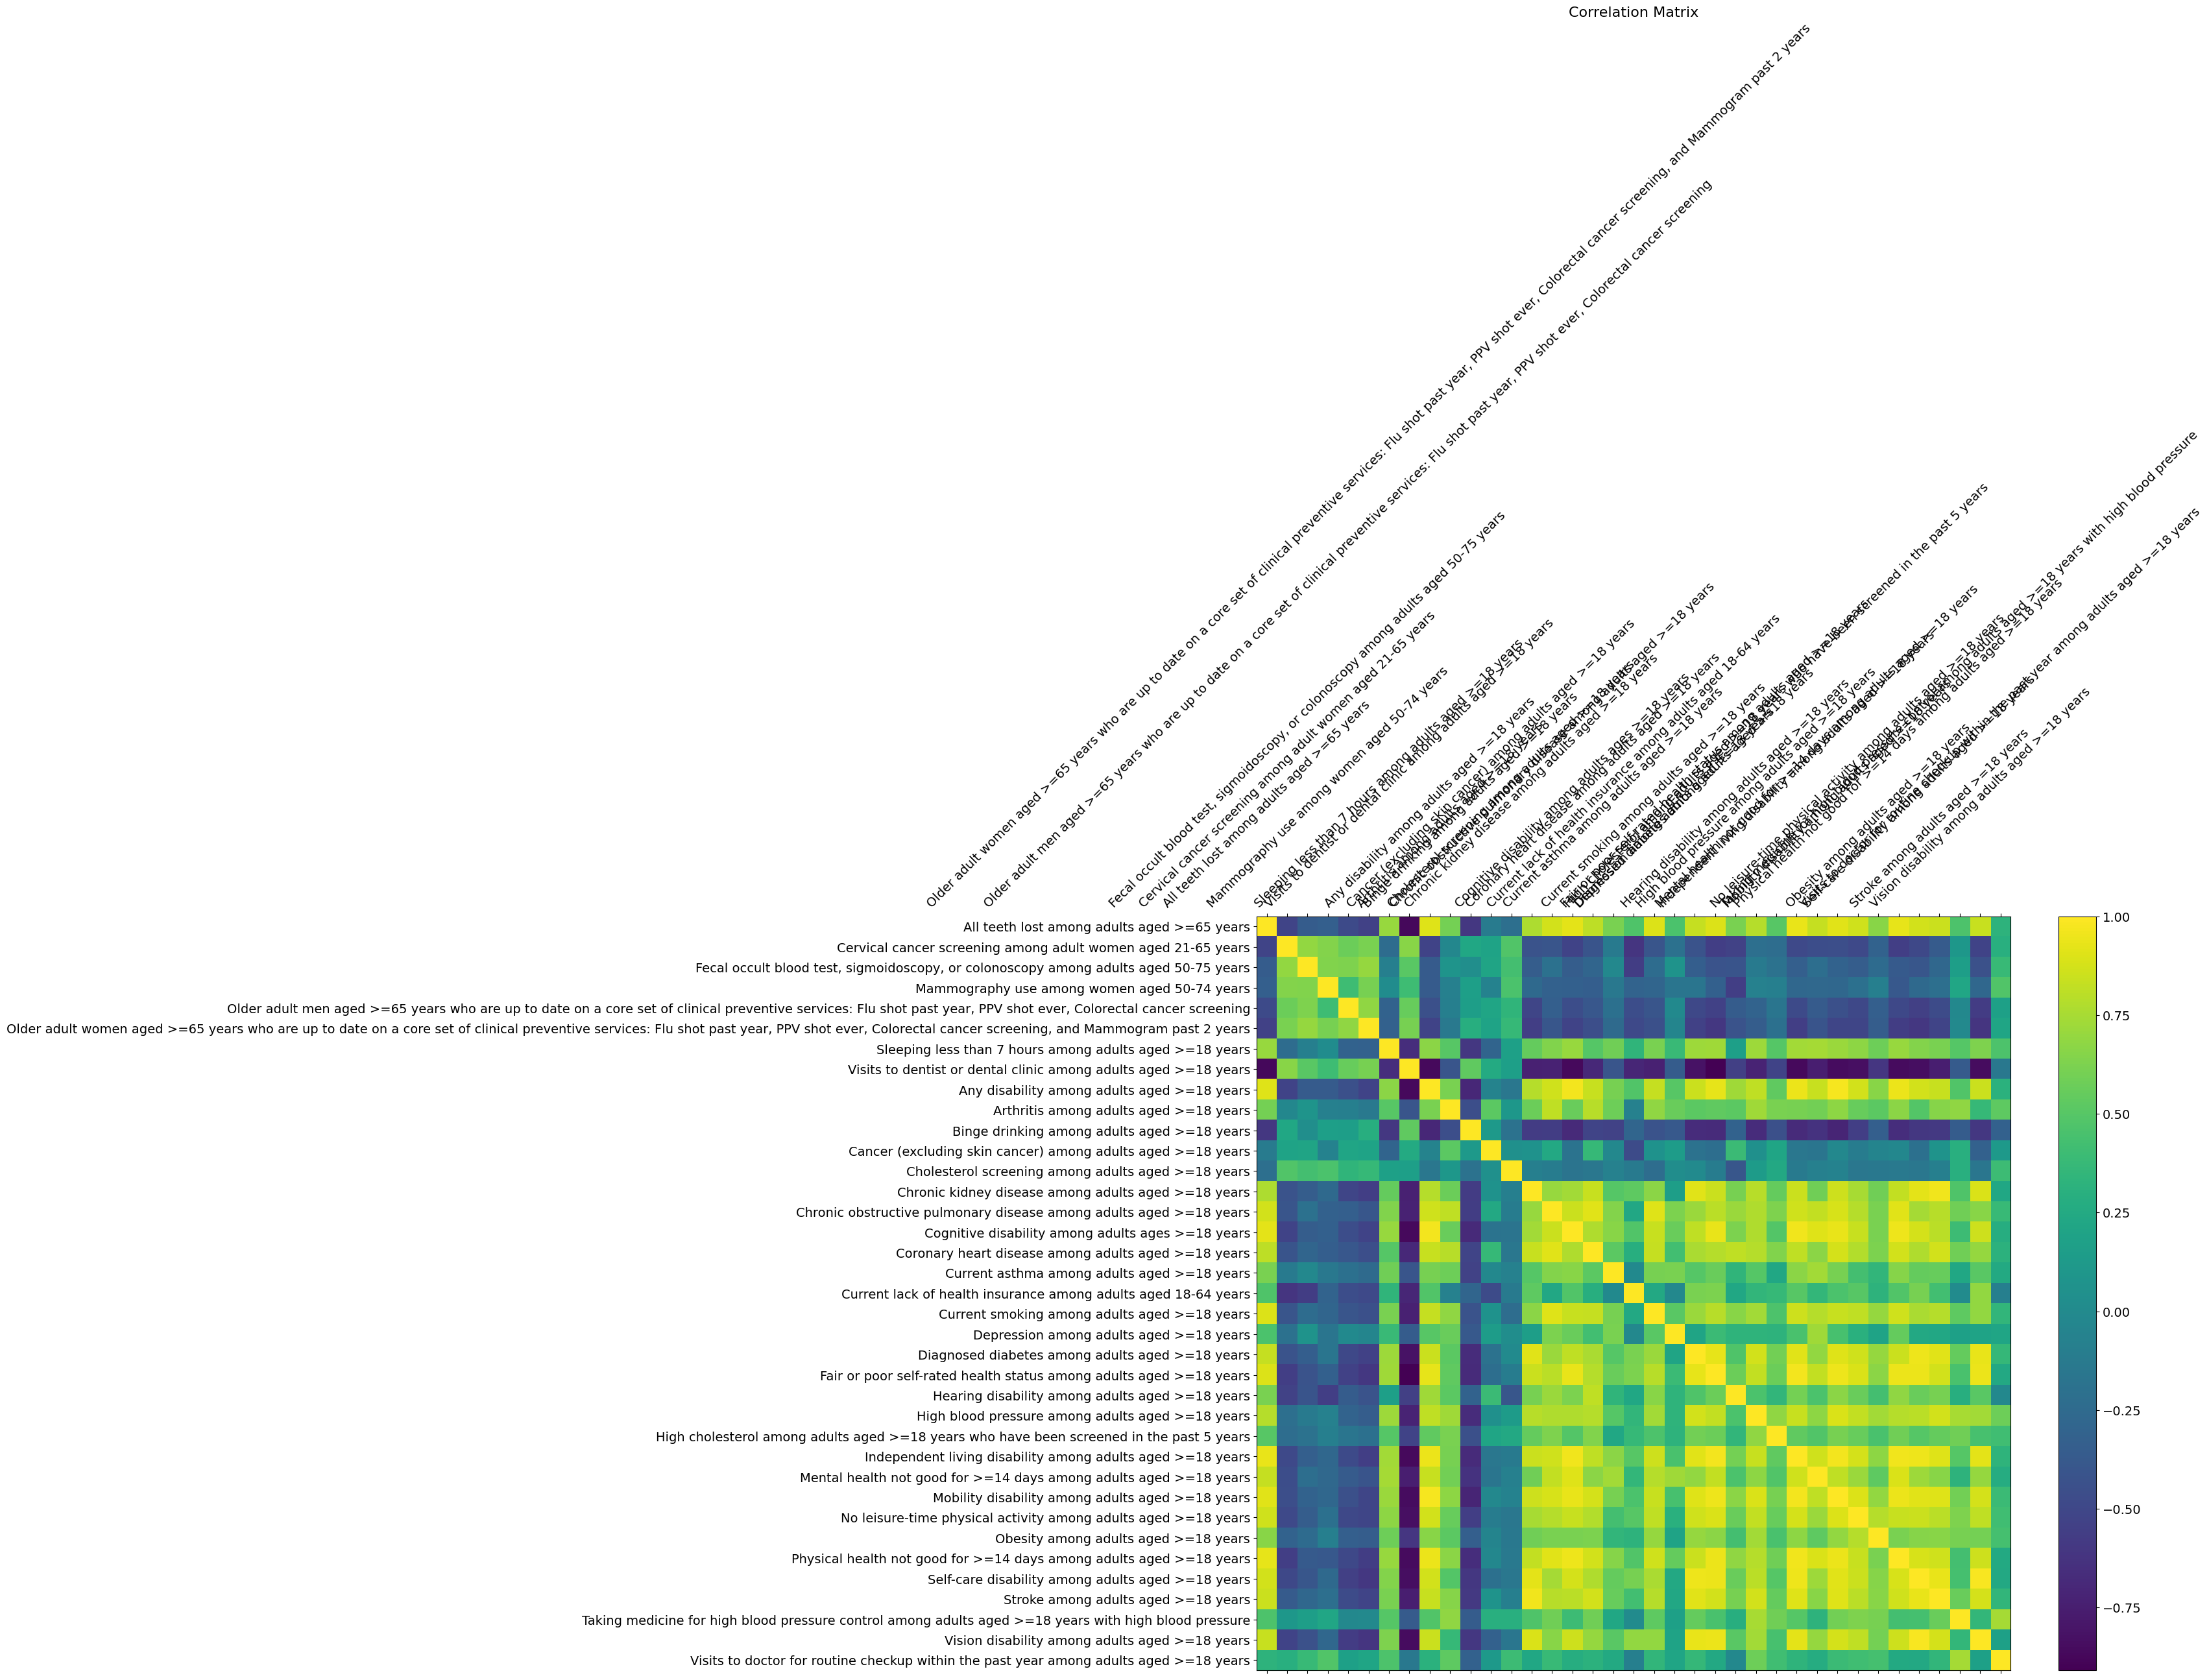

In [5]:
# create the figure set dimensions
f = plt.figure(figsize=(19, 15)) 

# matshow - creates matrix plot for df_office.corr(), fignum - assigned number for when there is multiple figures plotted
plt.matshow(cdc_20_21_noloc.corr(), fignum=f.number) 

# if you are using pandas 2.1, use the following code to replace the above line
# plt.matshow(df_office.corr(numeric_only=True), fignum=f.number)
plt.xticks(range(cdc_20_21_noloc.select_dtypes(['number']).shape[1]), cdc_20_21_noloc.select_dtypes(['number']).columns, fontsize=14, rotation=45) # add the x axis label
plt.yticks(range(cdc_20_21_noloc.select_dtypes(['number']).shape[1]), cdc_20_21_noloc.select_dtypes(['number']).columns, fontsize=14) # add the y axis label
# select_dtypes(['number']) - choose the numeric variables
cb = plt.colorbar() # add a legend to the right hand (default position)
cb.ax.tick_params(labelsize=14) # label size
plt.title('Correlation Matrix', fontsize=16) # add the title



#### 2.2 Summary Statistics: Mean, Median etc. 

In [6]:
cdc_20_21_noloc

,All teeth lost among adults aged >=65 years,Cervical cancer screening among adult women aged 21-65 years,"Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years",Mammography use among women aged 50-74 years,"Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening","Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years",Sleeping less than 7 hours among adults aged >=18 years,Visits to dentist or dental clinic among adults aged >=18 years,Any disability among adults aged >=18 years,Arthritis among adults aged >=18 years,...,Mental health not good for >=14 days among adults aged >=18 years,Mobility disability among adults aged >=18 years,No leisure-time physical activity among adults aged >=18 years,Obesity among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Self-care disability among adults aged >=18 years,Stroke among adults aged >=18 years,Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure,Vision disability among adults aged >=18 years,Visits to doctor for routine checkup within the past year among adults aged >=18 years
0,16.95,68.35,57.35,59.95,28.45,28.15,34.20,48.50,28.80,18.30,...,12.80,12.25,29.00,31.70,11.40,3.85,3.40,62.30,6.15,60.70
1,12.05,69.95,62.40,59.50,32.55,30.50,33.95,55.55,24.20,16.35,...,12.20,9.50,25.05,30.95,9.55,2.90,2.70,59.60,4.50,61.10
2,9.75,78.15,68.85,66.25,40.65,32.90,30.90,64.85,25.25,21.20,...,14.55,10.10,20.40,32.95,10.30,2.90,2.60,60.45,4.05,62.80
3,28.05,72.45,56.65,51.25,19.50,18.25,37.05,41.75,43.70,24.60,...,21.90,20.80,34.45,42.95,19.45,7.30,5.10,58.65,10.95,61.90
4,11.75,79.90,68.10,60.75,33.10,30.00,32.10,59.25,28.20,21.85,...,14.90,11.90,20.95,36.00,11.55,3.30,3.30,60.50,4.40,62.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,13.70,80.05,63.85,60.95,38.65,29.40,30.30,66.40,29.00,22.60,...,15.95,11.70,25.85,34.45,10.90,3.25,2.70,65.20,4.35,70.35
3072,7.95,84.70,67.35,71.70,42.30,37.65,26.50,76.70,21.25,20.50,...,12.45,8.45,16.30,21.95,8.20,2.35,2.20,63.85,3.10,66.75
3073,13.00,80.65,63.70,62.00,33.90,29.05,35.10,63.90,29.35,23.00,...,15.30,12.00,23.15,33.50,10.95,3.30,2.85,64.95,4.30,64.55
3074,12.75,80.40,59.00,63.60,41.05,26.05,30.50,64.45,30.10,25.45,...,14.45,12.80,23.85,33.55,11.10,3.40,3.05,68.15,4.50,65.05


#### 2.3 Feature Scaling:
Normalization or Standardization: Scale features so that they contribute equally to the distance computations in clustering (important for algorithms like K-Means).

This is not necessary for this case, as the values in each column represent percentage over a given population.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#### 2.4 PCA or t-SNE

#### 2.5 Regression Analysis
From using key facts from a survey of a given city can we predict the other attributes?

e.g. given the alcohol usage, tobacco usage, can we predict the overall dental, cardiovascular health outcomes of a city?

### Part 3 Clustering and Investigating Key Health Indicators 
This section is for performing the clustering analysis.


#### Part 3.0 Clustering Tendency Check
Hopkins Statistic: This test can be used to assess whether the data is significantly clustered or uniformly distributed. It’s a good practice to check if the data has a natural tendency to form clusters.


#### 3.1 K-Means
Key stat for k-Means:

Elbow Method, Silhouette Score

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(selected_columns_dbscan)
kmeans.labels_

#### 3.2 DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Select the columns for clustering
selected_columns = citydf_cleaned[new_col_list]

# Create an instance of DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to the selected columns
dbscan.fit(selected_columns)

#### 3.3 GMM

#### 3.4 Spectral Clustering

#### 3.5 BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies):

#### Superseded Code

In [ ]:
import plotly.express as px

fig = px.choropleth(cdc_20_21_plot, geojson=us_states_geojson, locations='GEOID', color='Depression among adults aged >=18 years',
                    color_continuous_scale="Viridis", 
                    range_color=(0, 100),
                    locationmode="ISO-3",      
                    labels={'Depression among adults aged >=18 years': 'Depression among adults aged >=18 years'})

fig.update_layout()
fig.show()

In [ ]:
import json
with open(r'/mnt/d/OneDrive - University College London/T1/CASA0007/0. Research Project/mapdata/d1c73f91dd9d175998ed166eb216994a-e89c35f308cee7e2e5a784e1d3afc5d449e9e4bb/counties.geojson') as f:
    us_states_geojson = json.load(f)